![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrando funções menos regulares

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def midpoint(f, a, b, n=1000,should_plot=False):
    xs,h = np.linspace(a,b,num=n,endpoint=False,retstep=True)
    xs = xs + h/2
    if(should_plot):
        ax = plt.subplot(111)
        ax.plot(xs,f(xs),label=f.__name__)
        ax.bar(xs[0], f(xs[0]), width=h, color='b', align='center',label="midpoint_approx")
        for x in xs[1:]:
            ax.bar(x, f(x), width=h, color='b', align='center')
        plt.legend()
        plt.title(f"Integral de {f.__name__} no intervalo [{a:.4f} , {b:.4f}]")
#         plt.show()
    return np.sum(f(xs))*h

def simpson(f, a, b, n=1000,should_plot=False):
    """Approximates the definite integral of f from a to b by the
    composite Simpson's rule, using n subintervals (with n even)"""

    if n % 2:
        n+=1

    h = (b - a) / n
    s = f(a) + f(b)

    for i in range(1, n, 2):
        s += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h)

    return s * h / 3
    

In [4]:
def f(x):
    return np.abs(np.sin(x))

## Questão 1: Primitiva

Dê uma primitiva analítica de $f$.

Dica: use a função `divmod` do python.

In [5]:
cte = (2*np.pi)
def F_(x):
    q,r = divmod(x,np.pi)
    if q%2 == 0:  
        return 2*q - np.cos(x)
    return 2*q + np.cos(x)
F = np.vectorize(F_)

In [6]:
assert np.isclose(F(10+0.1), F(10) + 0.1 * f(10), atol=1e-2)

In [7]:
assert np.isclose(F(2+0.01), F(2) + 0.01 * f(2), atol=1e-4)

In [8]:
ts = np.linspace(0,10, num=200)
Fts = F(ts)
assert np.all(Fts[1:] > Fts[:-1])

## Questão 2: Erros

Faça um gráfico dos erros de integração de $f$
pelos métodos do ponto médio e Simpson, no intervalo $[0,3]$

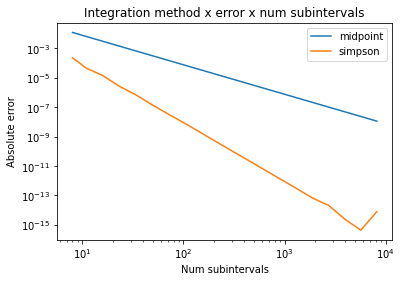

In [9]:
a, b = 0, 3
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
for m in [midpoint,simpson]:
    error = [m(f,a,b,n) - exact for n in ns]
    plt.loglog(ns,np.abs(error),label=m.__name__)
plt.title("Integration method x error x num subintervals")
plt.xlabel("Num subintervals")
plt.ylabel("Absolute error")
plt.legend()
ax = plt.gca()

In [10]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

Agora, repita o gráfico para o intervalo $[0,6]$:

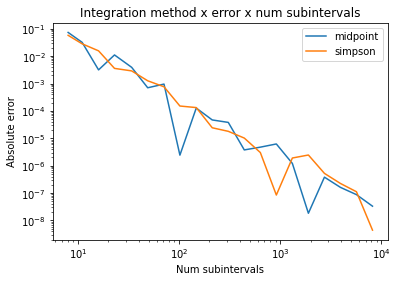

In [11]:
a, b = 0, 6
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
for m in [midpoint,simpson]:
    error = [m(f,a,b,n) - exact for n in ns]
    plt.loglog(ns,np.abs(error),label=m.__name__)
plt.title("Integration method x error x num subintervals")
plt.xlabel("Num subintervals")
plt.ylabel("Absolute error")
plt.legend()
ax = plt.gca()

In [12]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [13]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

Como esse gráfico é diferente do outro?

Duas coisas foram observadas quando aumentou-se o tamanho do intervalo. Em primeiro lugar observou-se a queda do erro no caso do simpson para o intervalo [0,3] era bem mais rápida em relação a regra do ponto do meio. Já para o intervalo [0,6] o erro em ambos métodos passaram a decair na mesma proporção. Em segundo lugar, percebe-se que a ordem de grandeza do erro aumentou cerca de $1e7$. Uma possível explicação é que, além do valor de h ter aumentado (manteve-se o N e dobrou o intervalo), o intervalo agora contém um ponto, $x = \pi$, no qual a derivada não existe. Logo a aproximação por polinômios (de Taylor) não é válida, explicando a causa do erro ser maior nesse caso (e não decair em linha reta conforme esperávamos).

Faça para mais um intervalo.

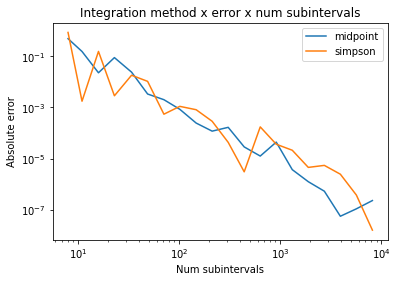

In [14]:
a, b = 0, 12
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
for m in [midpoint,simpson]:
    error = [m(f,a,b,n) - exact for n in ns]
    plt.loglog(ns,np.abs(error),label=m.__name__)
plt.title("Integration method x error x num subintervals")
plt.xlabel("Num subintervals")
plt.ylabel("Absolute error")
plt.legend()
ax = plt.gca()

Como isso ajuda a explicar o que você viu?

Novamente observou-se que o erro está aumentando. Isso pode ser explicado pelo limite superior do erro que observamos para ambos os casos. 
<p> Para o ponto médio temos que o erro é dado por:
$\begin{equation}
|E| \leq \frac{K(b-a)^3}{24n^2}\\
|f''(x)| \leq K
\end{equation}$
<p> Já para a regra de Simpson:
$\begin{equation}
|E| \leq \frac{K(b-a)^5}{180n^4},\\
|f^{(4)}(x)| \leq K
\end{equation}$
<p> Assim, vemos que enquanto mantemos o n fixo o erro cresce em ordem cúbica no caso do ponto médio e em ordem 5 para a regra de Simpson, de acordo com o aumento do intervalo. Além dos erros de aproximação, temos os erros associados aos pontos onde a função não é suave, isto é, nos pontos $\pi$ e $2\pi$.

## Questão 3: Encontrando o intervalo contendo $\pi$

Como $|\sin(x)|$ não é derivável em $\pi$, vamos ver quanto erro tem no sub-intervalo que "atravessa" $\pi$.

Escreva a função `I_x(a, b, x, n)` que retorna o intervalo contendo $x$ ao dividir $[a,b]$ em $n$ partes.

In [15]:
def I_x(a, b, x, n):
    """The interval  [xi, xi+h]  containing  x, when  [a,b]  is divided in  n  equal parts.
    Returns  None  if  x  is outside  [a,b]"""
    if (x-a)*(x-b) > 0:
        return None, None
    xs,h = np.linspace(a,b,num=n,endpoint=False,retstep=True)
    l = a 
    r = b
    for r in xs:
        if r > x:
            return l,r
        l = r

In [16]:
l, r = I_x(0, 6, np.pi, 10)
assert np.isclose(l, 3)
assert np.isclose(r, 3.6)

In [17]:
l, r = I_x(0, 60, np.pi, 10)
assert l <= np.pi <= r

In [18]:
l, r = I_x(0, 1, 0.4, 36)
assert l < 0.4 < r

Agora, faça o gráfico do erro de integração pelos métodos do ponto médio e de Simpson
apenas no intervalo contendo a "discontinuidade" $\pi$,
em função de $n$.

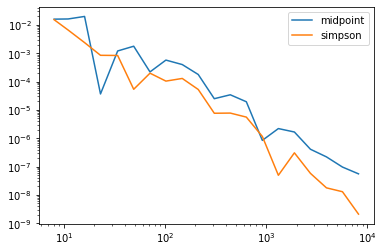

In [19]:
a, b = 0, 6
erro_middlepoint = []
erro_simpson = []
ns = np.logspace(3,13, num=20, dtype=int, base=2)
for n in ns:
    l,r=I_x(a, b, np.pi, n)
    exact = F(r) - F(l)
    erro_simpson.append(simpson(f,l,r,1) - exact)
    erro_middlepoint.append(midpoint(f,l,r,1) - exact)
plt.plot(ns,np.abs(erro_middlepoint),label="midpoint")
plt.plot(ns,np.abs(erro_simpson),label="simpson")
plt.legend()
plt.loglog()
ax = plt.gca()

In [20]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [21]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

Quanto do erro de cada método é causado pelo erro em apenas um intervalo?

Faça um gráfico comparando esses erros

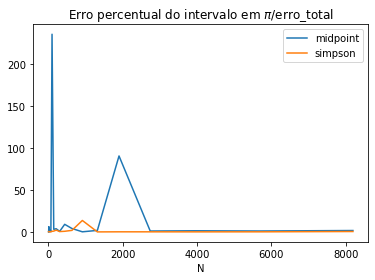

In [38]:
a, b = 0, 6
erro_middlepoint = []
erro_simpson = []
ns = np.logspace(3,13, num=20, dtype=int, base=2)
for n in ns:
    l,r=I_x(a, b, np.pi, n)
    exact_pi = F(r) - F(l)
    exact_total = F(b) - F(a)
    erro_total = (simpson(f,a,b,n) - exact_total)
    erro_pi = (simpson(f,l,r,1) - exact_pi)
    erro_simpson.append(erro_pi/erro_total)
    erro_total = (midpoint(f,a,b,n) - exact_total)
    erro_pi = (midpoint(f,l,r,1) - exact_pi)
    erro_middlepoint.append(erro_pi/erro_total)
plt.plot(ns,np.abs(erro_middlepoint),label="midpoint")
plt.plot(ns,np.abs(erro_simpson),label="simpson")
plt.xlabel("N")
plt.title("Erro percentual do intervalo em $\pi$/erro_total")
plt.legend()

Vemos nesse gráfico que o erro associado somente ao intervalo com pi corresponde a mais do que 100%
do erro total para um N pequeno no caso do ponto médio, e um valor próximo a 100% para N em torno de 2000. 
Já para o método de Simpson esse erro foi bem menor, percentualmente. Uma justificativa é que o erro no intervalo com $\pi$ pode ter um sinal diferente daquele observado no restante da integral. Isso faz com que o erro total, no intervalo [a,b], seja menor em módulo do que o erro no intervalo em $\pi$, gerando erros maiores ou próximos de 100%. Já para explicar a diferença entre o resultado com Simpson e aquele do ponto médio, devemos notar que o primeiro considera mais de um ponto, dado pela interpolação de um polinômio, para cada intervalo de integração. Por outro lado, o ponto médio utiliza apenas um único ponto, e isso pode gerar erros maiores dependendo do ponto escolhido. Vemos que, para valores próximos a pi, a função seno tem a derivada aproximadamente -1, o que significa que praticamente metade do retângulo aproximado pelo ponto médio ficará para fora da curva, para um $x \approx \pi$.

Mude a integral de $[0,6]$ por duas integrais, uma em $[0,\pi]$ e outra em $[\pi,6]$.
Faça um gráfico comparando os erros dos 4 métodos:
- Ponto médio vs Simpson
- Integral única vs Integral em 2 partes

Cuide de usar o mesmo número $n$ total de sub-intervalos, para não "roubar" em favor do que usa 2 intervalos :-)

In [24]:
class integral_2partes:
    def __init__(self,m):
        self.method = m
        self.__name__ = m.__name__ + "_2partes"
    def integrate(self,f,a,b,c,n,should_plot=False):
        if n%2 == 0:
            return self.method(f,a,c,int(n/2),should_plot=should_plot) + self.method(f,c,b,int(n/2),should_plot=should_plot)
        else:
            return self.method(f,a,c,int(np.floor(n/2)),should_plot=should_plot) + self.method(f,c,b,int(np.ceil(n/2)),should_plot=should_plot)

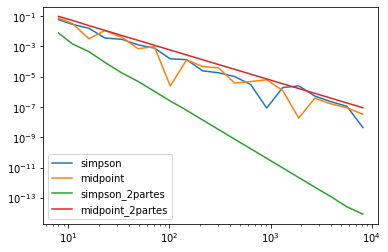

In [25]:
a, c, b = 0, np.pi, 6
exact = F(b) - F(a)
int_simp = integral_2partes(simpson)
int_midpoint = integral_2partes(midpoint)
methods = [simpson,midpoint,int_simp,int_midpoint]
for m in methods:
    m.__name__
    error = []
    for n in ns:
        if(m.__name__.endswith("2partes")):
            error.append(m.integrate(f,a,b,c,n) - exact)
        else:
            error.append(m(f,a,b,n) - exact)
    plt.plot(ns,np.abs(error),label=m.__name__)
plt.legend()
plt.loglog()
ax = plt.gca()

In [26]:
assert len(ax.lines) == 4
assert len(ax.legend().texts) == 4

O que você observa?
O que você conclui?

Concluimos que integrar por partes reduz significativamente o erro no caso de se utilizar o método de Simpson. Contudo, o mesmo não vale para o método do ponto médio, que apresentou um erro ainda maior em relação aos demais. Além disso, separando o em duas integrais o erro variou linearmente na escala log, conforme aumento de N, independente do método. Ou seja, ao incluirmos um intervalo que contém pi geramos não apenas um erro maior, quanto a relação entre o erro e N é pertubada. Isso porque o sinal do erro no intervalo contendo apenas pi pode diferir ou não do erro total (conforme visto em itens anteriores), e é potencialmente maior.  

<ipython-input-30-2c95e3537983>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


4.020401008931754

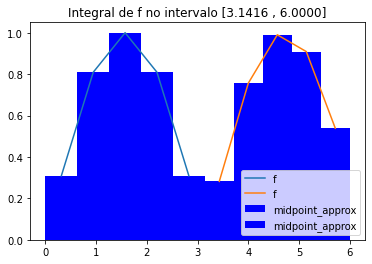

In [33]:
int_midpoint = integral_2partes(midpoint)
int_midpoint.integrate(f,a,b,c,10,should_plot=True)

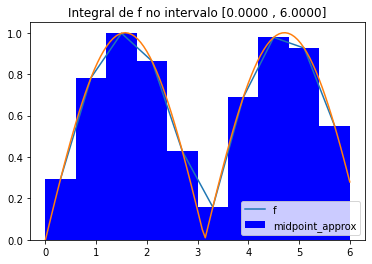

In [31]:
xs = np.linspace(0,6,100)
y = f(xs)
midpoint(f,a,b,10,should_plot=True)
plt.plot(xs,y)

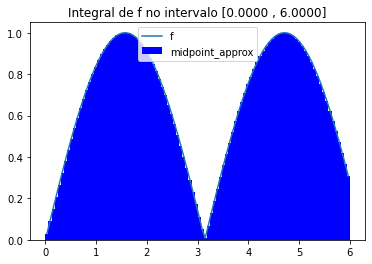

3.9602980800567926

In [29]:
midpoint(f,a,b,100,should_plot=True)
pl